In [1]:
# Importing standard libraries

import math  # Mathematical functions
import random  # Functions for generating random numbers
import pandas as pd  # Library for data manipulation and analysis

# Working with numerical arrays
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Advanced statistical plotting

# Libraries for statistical analysis
import itertools  # Functions for creating iterator-based operations
from scipy import stats  # Statistical functions
from scipy.stats import shapiro  # Shapiro-Wilk test for normality

# One-way ANOVA function
from scipy.stats import f_oneway

# Tasks 1-4


## Task 1: Permutations and Combinations

In the Lady Tasting Tea experiment, we have twelve cups of tea: six with milk poured first and six with tea poured first. A person claims they can distinguish the order by taste. To test this, we ask them to identify which six cups had milk poured first.<br>
### 1.1. Calculate the probability that they correctly identify all six cups by random guessing, assuming they have no special ability.

In [2]:
# Initial conditions of the experiment:

total_cups = 12
with_milk_first = 6
with_tea_first = 6


Calculating the number of ways to choose six cups with milk poured first out of twelve cups can be done using **the choose function** formula.

Where:<br>
**n** = total_cups<br>
**k** = with_milk_first<br>

**number_of_ways = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))**<br>

[Python math.comb() Method](https://www.w3schools.com/python/ref_math_comb.asp)

In [3]:
# The function **math.comb** in Python is the choose function and calculates all the possible ways to choose k from n. 
# The order does not matter and the elements can't be selected twice.
total_comb = math.comb(total_cups,with_milk_first)
total_comb

924

We found that there are 924 ways to choose 6 cups out of 12. We agreed, that the order doesn't matter, so there are only 1 way to choose all the cups with milk first. A person have no special powers and selection is just gessing.
Now we can calculate the probability that they selects the six correct cups.

In [4]:
# Calculating probability:
prob = 1/total_comb

In [5]:
# The cup labels:
labels = ['a','b','c','d','e','f','g','h','i','j','k','l']
len(labels)
#labels = list(range(total_cups))


12

Ref.: [Python – Itertools Combinations() function
](https://www.geeksforgeeks.org/python-itertools-combinations-function/) <br>

**itertools.combinations()** generates all possible tuples from a given sequence or set of elements, treating each element as unique based on its position in the sequence.<br>
We use it to generate all the ways six labeled cups might be choosen. 

In [6]:
# The list combs will keep possible combinations of six cups out of our list "labels":
combs = list(itertools.combinations(labels,with_milk_first))

# Show 10 out of 924
display(f'First 10 sets out of 924 possible options {combs[0:10]}')

print(f'Number of combinations {len(combs)}')

"First 10 sets out of 924 possible options [('a', 'b', 'c', 'd', 'e', 'f'), ('a', 'b', 'c', 'd', 'e', 'g'), ('a', 'b', 'c', 'd', 'e', 'h'), ('a', 'b', 'c', 'd', 'e', 'i'), ('a', 'b', 'c', 'd', 'e', 'j'), ('a', 'b', 'c', 'd', 'e', 'k'), ('a', 'b', 'c', 'd', 'e', 'l'), ('a', 'b', 'c', 'd', 'f', 'g'), ('a', 'b', 'c', 'd', 'f', 'h'), ('a', 'b', 'c', 'd', 'f', 'i')]"

Number of combinations 924


In [7]:
# Now we choose six random cups to put milk in first:
labels_with_milk = random.sample(labels,6)
labels_with_milk

['d', 'i', 'c', 'a', 'h', 'j']

List contain elements in a particular order, but we agreed that the order doesn't matter. We turn labels_with_milk into a set.

In [8]:
set_with_milk_first = set(labels_with_milk)
set_with_milk_first

{'a', 'c', 'd', 'h', 'i', 'j'}

Ref.: [Python Set intersection() Method](https://www.w3schools.com/python/ref_set_intersection.asp)<br>
Now, when we know what cups are with milk first, we can check how many cups will be named correctly in each possible way to choose them. 
The **intersection()** method returns a set that contains the similarity between two or more sets.


In [9]:
# In the list we will write the number of correctly guessed cups with milk in first in each of the possible sets.
no_correct_guesses = []

for comb in combs:
    #turn comb into a set:
    s1 =set(comb)
    s2 = set_with_milk_first
    
    #Checking if there are any overlaps
    overlap = s1.intersection(s2)
    
    # we need only a number of overlaps, so we do append of len(overlap) to the no_correct_guesses
    no_correct_guesses.append(len(overlap))
    #print(comb, overlap, len(overlap))

Ref.: [numpy.unique](https://numpy.org/devdocs/reference/generated/numpy.unique.html)<br>
We got the list of numbers of correctly named cups with milk in first. The maximum correct guesses in each set is six, and the minimum is zero. We want to figure out how many times all possible overlaps occurred.

In [10]:
counts = np.unique(no_correct_guesses, return_counts=True)
print(counts)

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1]))


We got 2 arrays. One with possible overlaps and another with it's frequency.<br>

There is **one** way to choose all the cups **with tee in first** and **one** way to choose all the cups **with milk in first.**<br>

**One** cup with milk in first might be found in **thirty six sets**, as well as **five** cups with milk in first.<br>

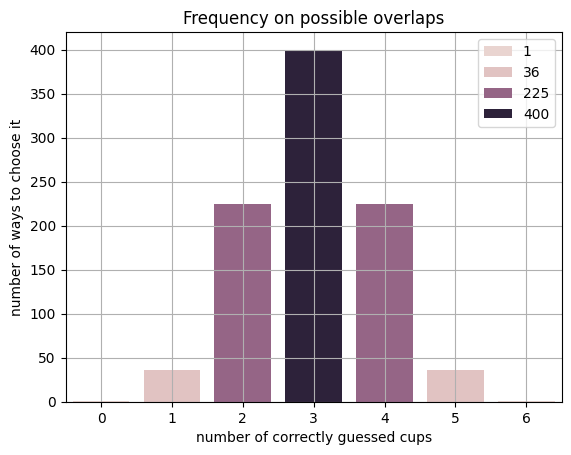

In [11]:
plt.fig = figsize=(10, 6)
sns.barplot(x=counts[0], y=counts[1], hue= counts[1])
plt.title('Frequency on possible overlaps')
plt.xlabel('number of correctly guessed cups')
plt.ylabel('number of ways to choose it')
plt.grid()
plt.show()

According to the barchart, for a person with no special power, there are more chanses to guess 3 cups with milk first. 

### 1.2. One error. Calculate the probability that they identify **at least five of the six** correct cups by random guessing.

Now I whant to determine the probability of guessing six cups with **one error**. That means that they must choose either **five** cups with milk in first out of **six**, or **6** cups with milk in first.  In this case I will calculate all the events together: 

In [12]:
#all the possible correct ways with one error and without an error:
correct_one = (36+1)

# all the possible ways to choose 6 cups
total_comb

prob_one_error = correct_one/total_comb
print(f'The probability to pick at least five cups correctly is {round(prob_one_error,3)*100}%')

The probability to pick at least five cups correctly is 4.0%


### 1.3. Are two errors acceptable?

In [13]:
# we need to sum all events with one error, with two and without an error
correct_two = (1 + 36 + 225)

# all possible ways to celect 6 cups
total_comb

prob_two_errors = correct_two/total_comb
print(f'The probability to pick at least four cups correctly is {(round(prob_two_errors,3)*100)}%')

The probability to pick at least four cups correctly is 28.4%


When designing a statistical test, we must decide on an acceptable significance level. Besides, two errors and four errors are equally likely, according to the barchart. If two errors are allowed, this increases the probability of a Type I error — where the null hypothesis is true, but we mistakenly reject it.  In this case, the null hypothesis is: "The person is selecting the cups randomly and does not have the ability to distinguish the cups with milk in first.

## Task 2: numpy's Normal Distribution
### 2.1.Generate Sample Data:
Use **numpy.random.normal()** to generate a sample of 100,000 values.
Set the mean to 10.0 and the standard deviation to 3.0.

Ref.:<br> [numpy.random.normal](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html#numpy-random-normal)

random.normal(loc=0.0, scale=1.0, size=None)<br>

loc : Mean (“centre”) of the distribution.<br>
scale: Standard deviation (spread or “width”) of the distribution.<br>
size: Output shape.

In [14]:
#mean
mean=10.0

#standard deviation 
std=3.0

#sample size
size=100000

#Seed for repeating the results
seed = 2
np.random.seed(seed)

sample = np.random.normal(mean,std,size)
#sample[0:8]

### 2.2.Test for Normality:
Use the **scipy.stats.shapiro()** function to assess whether the generated sample is normally distributed.
Interpret and explain the results.


Ref.:<br>[Shapiro-Wilk test](https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/)<br>
[Alpha level](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/what-is-an-alpha-level/)<br>

**Shapiro-Wilk test** is a test of normality, it determines whether the given sample comes from the normal distribution or not. 

**Null hypothesis**: the random variable in the sample is normally distributed.<br>
**Alternative Hypothesis**: The random variable in the sample is not normally distributed.


Setting **Alpha Level**

The significance level, or alpha level, is the probability of making the wrong decision when the null hypothesis is true (Type I error).

We set alpha = 0.05, meaning the probability of making a Type I error is 5%.

If **p-value < alpha**, we reject the null hypothesis, indicating that the data likely does not follow a normal distribution.

If **p-value > alpha**, we fail to reject the null hypothesis, meaning we do not have enough evidence to conclude that the sample data does not come from a normal distribution.

In [15]:
alpha = 0.05

# function for performing the Shapiro-Wilk Test

def test(data_sample, sanificanse_level):
    result = shapiro(data_sample)
    
    if result[1] > alpha:
        print(
            f'We did not get enough evidence to reject The Null Hypothysis \nthat the random variable in the sample is normally distributed. P-Value = {round(result[1],2)}'
        )
    else:
        print(f'There is no evedense to accept The Null Hypothysis. P-Value = {round(result[1],2)}'
        )


In [16]:
#Run the function with our sample:
test(sample,alpha)

We did not get enough evidence to reject The Null Hypothysis 
that the random variable in the sample is normally distributed. P-Value = 0.69


/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


The Shapiro-Wilk test was performed, and the results indicate that our sample data is consistent with a normal distribution.


### 2.3. Visualize the Data:
Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.


For creating probability density function we need to find minimal and maximun x value, a size of sample and corresponding y values

Ref.: [How to Plot Normal Distribution over Histogram in Python](https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/)


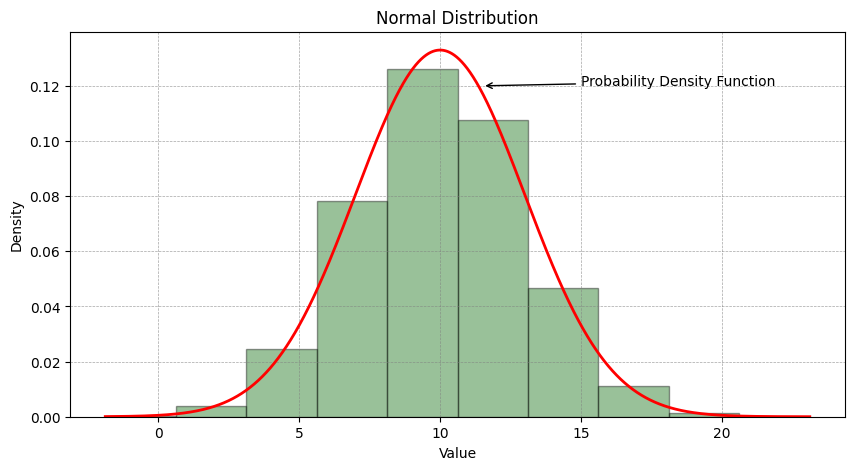

In [17]:
#Histogram
fig,ax = plt.subplots(figsize=(10, 5))
ax.hist(sample, density=True,color='darkgreen',edgecolor='black',alpha=0.4)
# density=True is a parameter for normalization.
# The hist is normalized so that the area under the histogram integrates to 1.

ax.set_title("Normal Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

#Probability Density Function parameters:
min_x = sample.min() #minimal x value 
max_x = sample.max() #maximal x value 
x = np.linspace(min_x, max_x, len(sample))
y = stats.norm.pdf(x, mean, std) # geting y values

#Plot
ax.plot(x,y,'r-', label='PDF', linewidth=2)
ax.annotate(xytext=[15, 0.12], text='Probability Density Function', xy=[11.5,0.12], arrowprops={'arrowstyle': '->', 'color': 'black'})

#show the plot
plt.show()

## Task 3: t-Test Calculation


### 3.1. Consider the dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

I have [data](https://github.com/ianmcloughlin/2425_applied_statistics?tab=readme-ov-file) here, and I want to create 2 arrays from data.

In [18]:
# Creating two arrays with data representing hartrates of patients
# before and after two-week exercise program.

heartrate_before = np.array([63,68,70,64,74,67,70,57,66,65])
heartrate_after = np.array([64,64,68,64,73,70,72,54,61,63])

In [19]:
# Creating Pandas DataFrame
hartrate_df = pd.DataFrame({
    'heartrate_before': heartrate_before,
    'heartrate_after': heartrate_after
})

#### 3.1.1. Assumptions.
* Assumption #1: The dependent variable, **heart rate**, is measured on a continuous scale (interval data).<br>
* Assumption #2: The independent variable consists of two related groups: heart rates measured **before** and **after** the two-week exercise program.<br>
* Assumption #3: The differences between paired observations (heart rate before and after) should not have significant outliers.(Check with box plot)<br>
* Assumption #4: The distribution of the differences in heart rates between the two groups should be approximately normally distributed.(Check with Q-Q plot or Sapiro-Wilk test).


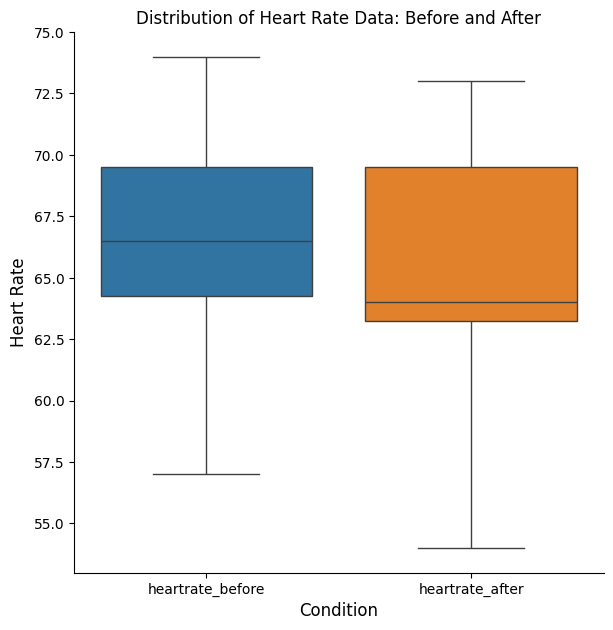

In [20]:
# Create a box-and-whisker plot to visualize the distribution of heart rate data
# and identify potential outliers for both the "Before" and "After" conditions.
sns.catplot(hartrate_df, kind='box', height=6)
plt.title("Distribution of Heart Rate Data: Before and After")
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Heart Rate", fontsize=12)
plt.show()

#### Shapiro-Wilk test.

In [21]:
# To perform the Shapiro-Wilk test I will use the function from Task #2:

# Checking thae data with heart rate before the program:
alpha=0.05
test(heartrate_before,alpha)

We did not get enough evidence to reject The Null Hypothysis 
that the random variable in the sample is normally distributed. P-Value = 0.91


In [22]:
# Checking thae data with heart rate after the program:
alpha=0.05
test(heartrate_after,alpha)

We did not get enough evidence to reject The Null Hypothysis 
that the random variable in the sample is normally distributed. P-Value = 0.55


In [23]:
# Checking the ststistics in both groups:
hartrate_df.describe()

,heartrate_before,heartrate_after
count,10.00000,10.000000
mean,66.40000,65.300000
std,4.64758,5.677441
min,57.00000,54.000000
25%,64.25000,63.250000
50%,66.50000,64.000000
75%,69.50000,69.500000
max,74.00000,73.000000


The mean heart rate for the 'heartrate_before' group is 66.4, while for the 'heartrate_after' group, it is 65.3. To determine whether this difference is statistically significant, a paired t-test can be performed.

### 3.2.Paired Samples $t$-Test
#### Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

The means of these groups are quite similar. I will use a t-test to compare the means and determine if the observed difference is statistically significant.

[Types of $t$-Test](https://datatab.net/tutorial/t-test)<br>
[$t$-tests in Python](https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=720362650453&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=1007890&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-bfcm24&gad_source=1&gclid=Cj0KCQiAi_G5BhDXARIsAN5SX7pQ0aY0QXyd2Ix2RLW2lQYol1FE9E3dYWeKhhA_uoVpgOi7zTYLsmYaAnkIEALw_wcB)

**The $t$-Test** is a statistical test procedure that tests whether there is a significant difference between the means of two groups.

* One-Sample $t$-Test: Compares the mean of one group to a known value.
* Independent Samples $t$-Test: Compares the means of two independent groups.
* Paired Samples $t$-Test: Compares the means of two related groups (e.g., before-and-after).

If assumptions like normal distribution or equal variances are not met, non-parametric alternatives like the Mann-Whitney U test or Wilcoxon test may be used​.


To perform a Paired Samples $t$-Test I use the [ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) function from the scipy.stats module. 

#### 3.2.1. Hypotheses.

**Null Hypothesis:**
There is no significant difference in the average heart rates of patients before and after the two-week exercise program.<br>

**Alternative Hypothesis:**
There is a significant difference in the average heart rates of patients before and after the two-week exercise program.

#### 3.2.2. Significance level.
[Significance level](https://statisticsbyjim.com/glossary/significance-level/)<br>

The significance level is the probability of rejecting the null hypothesis when it is true. A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.

If the **p-value** is less than significance level, the null hypothesis will be rejected. 

In [24]:
# Setting a sagnificance level
alpha = 0.05

#### 3.2.3. $t$-Test

In [25]:
# Two samples
x = heartrate_before
y = heartrate_after

# significance level
alpha = 0.05

# Function for paired t-test:
def paired_ttest(first_sample,second_sample,signif_lv):

    t_stat, p_val = stats.ttest_rel(x,y)

    print("t-statistic = " + str(t_stat))  
    print("p-value = " + str(p_val))
    print("------------------------") 

    if p_val <= alpha:
        print('There might be a statistical difference between the two samples.')
    else:
        print('There is no evidence that the difference\nbetween the samples is statistically significant.')    


In [26]:
#Running the function
paired_ttest(x,y,alpha)

t-statistic = 1.337227482480628
p-value = 0.21396011317404623
------------------------
There is no evidence that the difference
between the samples is statistically significant.


#### 3.2.4. Interpretation of the test results.


**t-statistic:** measures the size of the difference between the samples.

**p-value**: indicates whether the observed difference is statistically significant.

**alpha**: The significance level (commonly set to 0.05), meaning that if the p-value is less than or equal to 0.05, the difference is considered statistically significant.

Since the p-value (0.2139) is greater than the significance level (0.05), **there is no evidence to suggest a statistically significant difference in heart rates before and after the two-week exercise program**

## Task 4. ANOVA
Estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.
Now use a loop to perform the following test 10,000 times.
Use numpy.random.normal to generate three samples with 100 values each.<br> Give each a standard deviation of 0.1.<br> Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.<br>
Perform one-way ANOVA on the three samples and add 1 to no_type_ii whenever a type II error occurs.
Summarize and explain your results.

**A Type II error**, or a false negative, occurs when the null hypothesis is not rejected, even though it is actually false.

**The Null Hypothesis** for ANOVA: There is no significant statistical difference between the samples.<br>
**The Alternative Hypothesis** for ANOVA: There might be a difference between the samples.<br>

If the p-value < 0.05, we reject the null hypothesis (The difference is possible).

In the given case a Type II error may happen when the p-value > 0.05, so we don’t reject the null hypothesis, even though it’s actually false. 

In [27]:
# The counter for errors, when p-value > 0.05
no_type_ii = 0

# The counter for p-value < 0.05
p_v_less = 0 

# The counter for p-value > 0.05
p_v_more = 0

# How many times the test performed
n = 10000

# Generating three samples
for _ in range (n):   
    sample_a = np.random.normal(loc=4.9, scale=0.1,size=100)
    sample_b = np.random.normal(loc=5.0, scale=0.1,size=100)
    sample_c = np.random.normal(loc=5.1, scale=0.1,size=100)  
    
# Performing the One-way ANOVA
    f, p_value = f_oneway(sample_a, sample_b, sample_c)
    if p_value > 0.05:
        p_v_more += 1
        no_type_ii +=1
    else:
        p_v_less += 1
print(f'No difference: {p_v_more} times. The samples are different: {p_v_less} times.')
print(f'The type II error was obrerved {no_type_ii} times out of {n} trials.')

No difference: 0 times. The samples are different: 10000 times.
The type II error was obrerved 0 times out of 10000 trials.


### Summary
The test was run many times with the given parameters, and no Type II errors were found, showing the test could detect small differences between the samples. However, when the means of the samples were made the same, a Type I error happened in 3-10% of the cases.

# End